<img src='img/logo.png'>
<img src='img/title.png'>

# Supervised Learning

<img src='img/supervised_workflow.svg' width=60%>

# Table of Contents
* [Supervised Learning](#Supervised-Learning)
	* [Setup](#Setup)
	* [Definitions](#Definitions)
* [Predict home prices](#Predict-home-prices)
	* [Train and Test](#Train-and-Test)
	* [Fitting](#Fitting)
	* [Predicting](#Predicting)
	* [Scoring](#Scoring)
* [Exercises](#Exercises)
	* [Predict hourly bike rentals](#Predict-hourly-bike-rentals)
* [Regression and classification](#Regression-and-classification)
* [Complexity vs Generalization](#Complexity-vs-Generalization)
	* [Exercise](#Exercise)
* [Missing Data](#Missing-Data)
* [Regression and Classification Models](#Regression-and-Classification-Models)
* [Features](#Features)


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()
%matplotlib inline

[mglearn](https://github.com/amueller/introduction_to_ml_with_python) is a special package written by Andreas Müller to accompany the book _Introduction to Machine Learning with Python_.

In [2]:
import src.mglearn as mglearn

## Definitions

<big><big><big>
<tt>X</tt>: the matrix of observations
<br><br>
<tt>y</tt>: the set of outcomes (discrete labels or continuous values)
</big></big></big>

<img src='img/data_representation.svg' width=90% align='left'>

# Predict home prices

Model and predict median home prices in the Boston area.

The training data consists of attributes from 506 *tracts*.

>The "Census Tract" is an area roughly equivalent to a neighborhood established by the Bureau of Census for analyzing populations. They generally encompass a population between 2,500 to 8,000 people.

In [3]:
from sklearn import datasets

boston = datasets.load_boston()

print(boston['DESCR'][:1397])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

"Half of my job as a data anlyst is cleaning data..."

*"How could it only be 50%?!"*

In [4]:
houses = pd.DataFrame(data=boston.data, columns=boston.feature_names)
houses['price'] = boston.target
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Does the number of rooms influence price?
--------------------------------------

In [5]:
houses[['RM','price']].corr()

,RM,price
RM,1.00000,0.69536
price,0.69536,1.00000


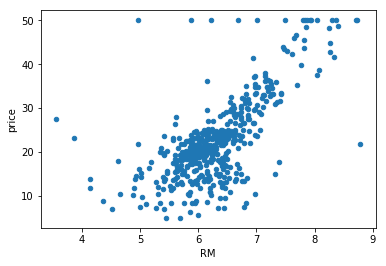

In [8]:
houses.plot.scatter(x='RM', y='price')

_Remember that pandas dataframes have .plot.type() method!_

## Train and Test

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
Reserve a portion of the dataset to <i>evaluate</i> the model
</font></div>

<img src='img/train_test_split_matrix.svg'>

Determine the full X and y datasets

In [9]:
X = houses.drop('price', axis='columns')
y = houses['price']

In [12]:
X.shape, y.shape

((506, 13), (506,))

X capital, y lowercase => just convention

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size=+2>
reserve 25% of the rows for <tt>X_test</tt> and <tt>y_test</tt>
</font></div>

By default a random sample is taken. `random_state=0` means we'll get the same split every time and is good practice while developing your model.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

`command?` to show manual information for a `command`

In [14]:
X_train.shape, X_test.shape

((379, 13), (127, 13))

In [15]:
y_train.shape, y_test.shape

((379,), (127,))

## Fitting

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
All <b>models</b> implement a <tt>.fit()</tt> method to train the model
</font></div>

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

`lr` is an *instance* of a linear regression model - not yet trained here

In [21]:
type(lr)

sklearn.linear_model.base.LinearRegression

We'll use Pandas to select the *features* (columns) to fit the model.

When using Pandas it's preferable to pass DataFrames instead of Series objects.

In [20]:
lr.fit(X_train[['RM']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
Use <tt>.predict()</tt> to generate outcomes on new observations
</font></div>

In [22]:
lr.predict(X_test[['RM']])

array([22.7979148 , 21.70829974, 23.17043277, 13.63397276, 21.85730693,
       18.15075314, 18.81197253, 19.39868833, 10.13230385, 23.46844714,
       19.29624589, 25.81531035, 22.87241839,  7.14284715, 36.47863721,
       29.39148285, 21.95043642, 31.68246836, 24.78157298, 18.29976032,
       23.66401908, 18.5791488 , 20.87944726, 24.18554423, 16.73518485,
       -0.20506979, 19.37074948, 16.98663448, 38.96519466, 20.55349404,
       21.41959831, 20.45105159, 21.80142923, 20.58143288, 23.57088959,
       17.86205171, 19.57563437, 18.53258405, 22.93760904, 21.20540048,
       20.87944726, 17.70373157, 21.0377674 , 14.3603828 , 24.72569529,
       23.61745433, 17.74098337, 20.89807316,  9.48039741, 26.46721679,
       21.11227099, 16.62342946, 19.51975667, 40.73465501, 17.43365605,
       18.66296534, 16.95869564, 18.74678189, 17.43365605, 19.32418474,
       18.6164006 , 20.74906597, 28.84201885, 24.83745068, 17.02388628,
       24.87470248, 25.79668445, 23.20768457, 27.63133545, 18.68

## Scoring

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>

How accurate is the prediction over data that was *not* used in training?
</font></div>

For linear regression models the *score* is the $R^2$ value called the coefficient of determination.

In [23]:
lr.score(X_test[['RM']], y_test)

0.46790005431367815

This is not a great score. There are many points far from the linear regression line.

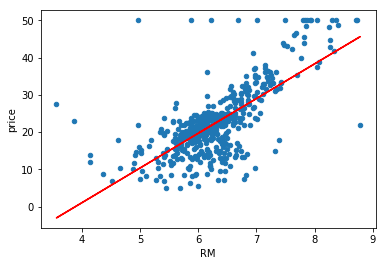

In [24]:
ax = houses.plot.scatter(x='RM', y='price')
ax.plot(houses['RM'], lr.predict(houses[['RM']]), 'r-')

# More features

when we don't feature-select only the number of rooms, we get a slightly better score on the LR model

In [25]:
lr2=LinearRegression()

In [29]:
lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
lr2.predict(X_test)

array([24.95242095, 23.62103603, 29.21341544, 11.97586964, 21.33688522,
       19.47270023, 20.42304705, 21.52151744, 18.99420776, 19.91486748,
        4.93479475, 16.05522458, 16.91865924,  5.34748135, 39.8532679 ,
       32.33300268, 22.33140869, 36.54399797, 31.03481174, 23.32519523,
       24.92272042, 24.26965237, 20.71353663, 30.45335016, 22.45699529,
        9.87018454, 17.70327024, 17.96092462, 35.69651424, 20.79470104,
       18.10460338, 17.6798399 , 19.71471124, 23.80071994, 29.06967938,
       19.22845092, 10.9827218 , 24.56507125, 17.29284531, 15.18639065,
       26.10224841, 20.87956585, 22.26213357, 15.32658621, 22.85990998,
       25.0946293 , 19.74938589, 22.69795393,  9.66269908, 24.46020219,
       20.69146192, 17.51925862, 24.45743226, 30.094858  , 13.30018094,
       21.51999888, 20.66106358, 15.34165143, 13.77778277, 22.07762378,
       17.53500273, 21.60779414, 32.91070817, 31.32857473, 17.65125782,
       32.70348085, 18.55078395, 19.31741597, 18.78727742, 23.04

In [31]:
lr2.score(X_test, y_test)

0.6353620786674655

# Exercises

<img src='img/topics/Exercise.png' align='left'>
<div class='alert alert-success' align='center'><font size='+2'>
Practice <tt>LinearRegression</tt> fitting and scoring
</font></div>

## Predict hourly bike rentals

This dataset is hourly bike rentals in the citybike platform.

The `'cnt'` column is the number of rentals, which we want to predict from date and weather data. The weather data have been normalized for convenience.

The bike data come from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [32]:
bikes = pd.read_csv('data/bike_day_raw.csv')
bikes.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


1. Split the data into a training and a test set using ``train_test_split``.
1. Make a new ``LinearRegression`` model and fit over the training set
1. Evaluate the model with `.score()` over the testing set
1. Try fitting and scoring with different sets of features
    * You may plot or perform statistical tests to find reasonable features.

In [33]:
X = bikes.drop(['cnt','workingday'], axis='columns')
y = bikes['cnt']

In [148]:
# your solution here

X_train, X_test, y_train, y_test = train_test_split(X, y)
# split X and y randomly into a training and testing set (25%)

bikes_lr = LinearRegression()
bikes_lr.fit(X_train, y_train)
# create linear regression model and train it on the training sets

bikes_lr.score(X_test, y_test)
# score the model's performance on the testing set

0.4900145377680442

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
# split X and y randomly into a training and testing set (25%)

for feature in X_train.columns:
    bikes_lr = LinearRegression()
    bikes_lr.fit(X_train[[feature]], y_train)
    print(feature, bikes_lr.score(X_test[[feature]], y_test))
# loop through each feature and train/test a model for each

season 0.18840664687990005
mnth 0.054473515020125644
holiday -0.027697793635603984
weekday -0.005817733430509842
weathersit 0.09083975641808895
temp 0.4472138466625714
atemp 0.4341069943029339
hum -0.012790074095071935
windspeed 0.028315984799043178


<button data-toggle="collapse" data-target="#code1" class='btn btn-primary'>Show solution</button>

<div id="code1" class="collapse">

```python
X_train, X_test, y_train, y_test = train_test_split(X, y)

bikes_lr = LinearRegression()
bikes_lr.fit(X_train, y_train)

bikes_lr.score(X_test,y_test)
```

# Regression and classification

Predicting the price or a home, the mpg rating of a car or the number of bike rides per day is called **regression**.

Classification predicts a discrete *label* for an observation.

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'][:471])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica


In [197]:
X = iris.data[:, 2:4]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [152]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [198]:
X.shape

(150, 2)

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
KNeighbors predicts a label by consensus of training data in the local region.
</font></div>

Notice that there is some overlap between the versicolor and virginica regions.

In [ ]:
X.s

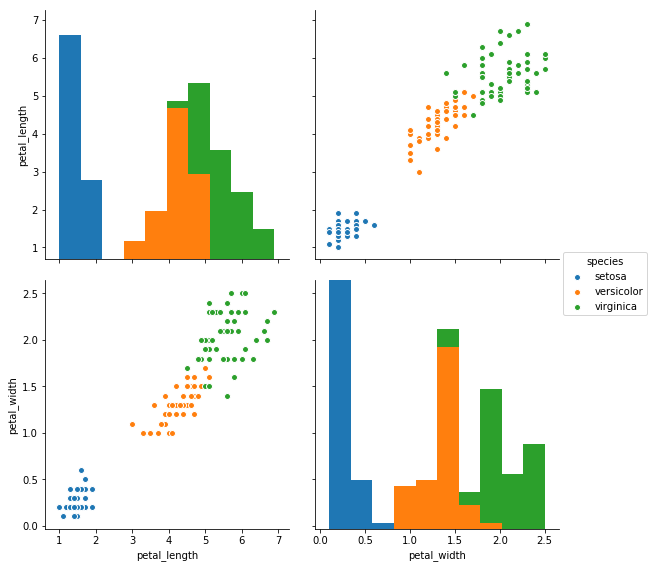

In [199]:
flowers = pd.read_csv('data/iris.csv')
sns.pairplot(flowers, vars=['petal_length','petal_width'], hue='species', size=4)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

#### describe K-neighbors classifier method
`KNeighborsClassifier?`

K-neighbors classifier guesses a category for a novel observation datapoint, based on the categories to which its neighbors belong (majority-rules)

In [208]:
knn = KNeighborsClassifier(n_neighbors=10)

We'll just train on petal width and petal length for now.

In [210]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9736842105263158


In [185]:
knn.predict(X_test)

array([1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1,
       1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1])

By evaluating a grid of points in the space of the two features we can plot the *decision boundaries* between each label.

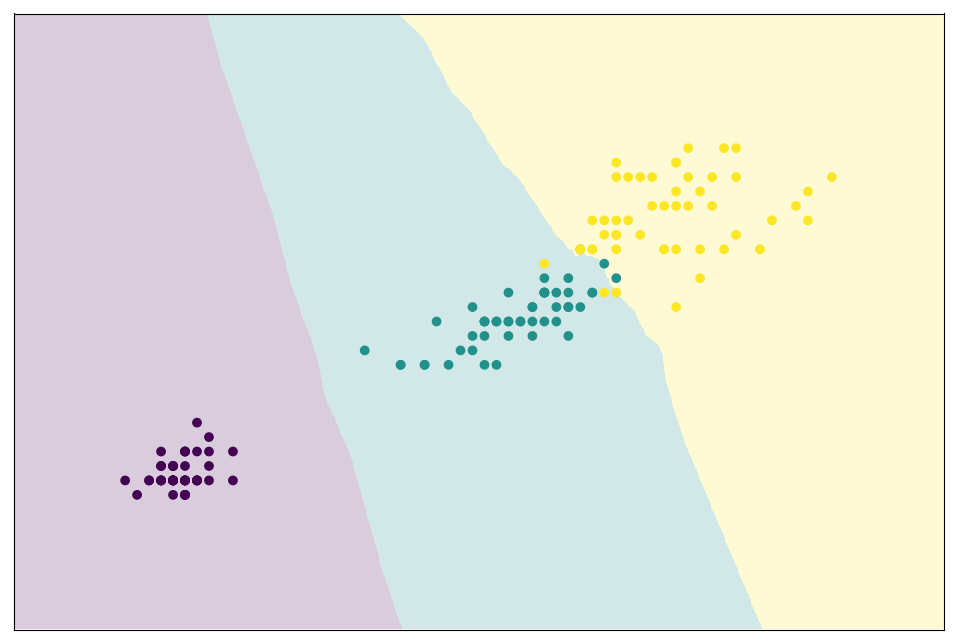

In [228]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(knn, X, alpha=0.2, ax=ax)

# Complexity vs Generalization

The `LinearRegression` model is the simplest regression model:
* It is not very complex: It cannot fit complicated relationships
* *When* it can accurately model the data it is very general

*It is hard to overfit a `LinearRegression`.

The `KNeighbors` model:
* *less general* for small values of `n_neighbors`
* large values of `n_neighbors` will end up predicting only the most commonly occurring label

In [212]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [213]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

By looking for consensus with only the nearest point, `KNeighbors` has almost *memorized* the training data.

In [216]:
knn1.score(X_test, y_test)

0.9736842105263158

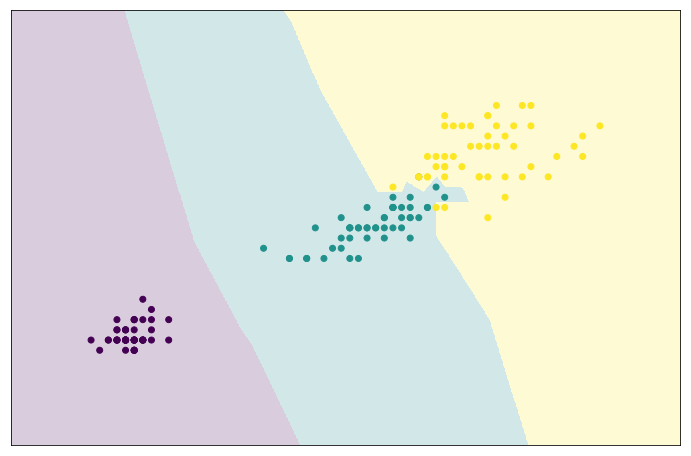

In [226]:
fig, ax = plt.subplots(figsize=(12,8))
sns.reset_orig()
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(knn1, X, alpha=0.2, ax=ax)

An overly complex model may *overfit* the data. this reduces the *generality* of the model and leads to loss of predictive value

## Exercise

<img src='img/topics/Exercise.png' align='left'>
<div class='alert alert-success' align='center'><font size='+2'>
Try to determine a good value for <tt>n_neighbors</tt>
</font></div>

Notice that the `sepal_width` and `sepal_length` features provide a less distinct separation between versicolor and virginica.

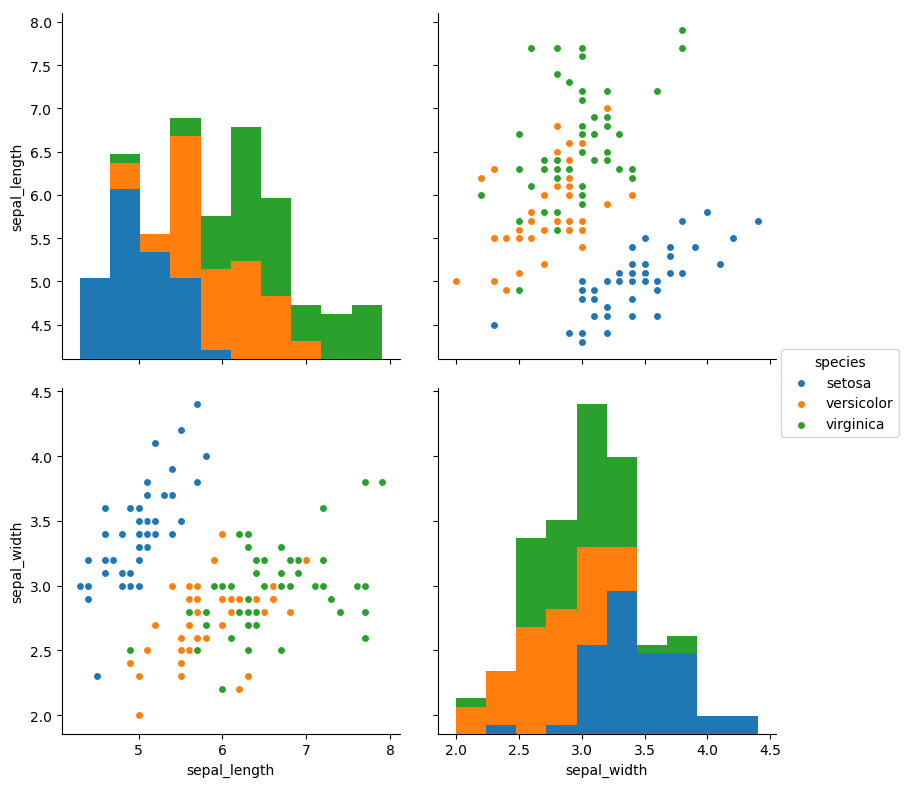

In [229]:
flowers = pd.read_csv('data/iris.csv')
sns.pairplot(flowers, vars=['sepal_length','sepal_width'], hue='species', size=4)

In [230]:
X = iris.data[:, 1:3]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Fit and score a `KNeighbors` model with a different value of `n_neighbors` to determine an optimal tradeoff between complexity and generality.

7 0.9473684210526315


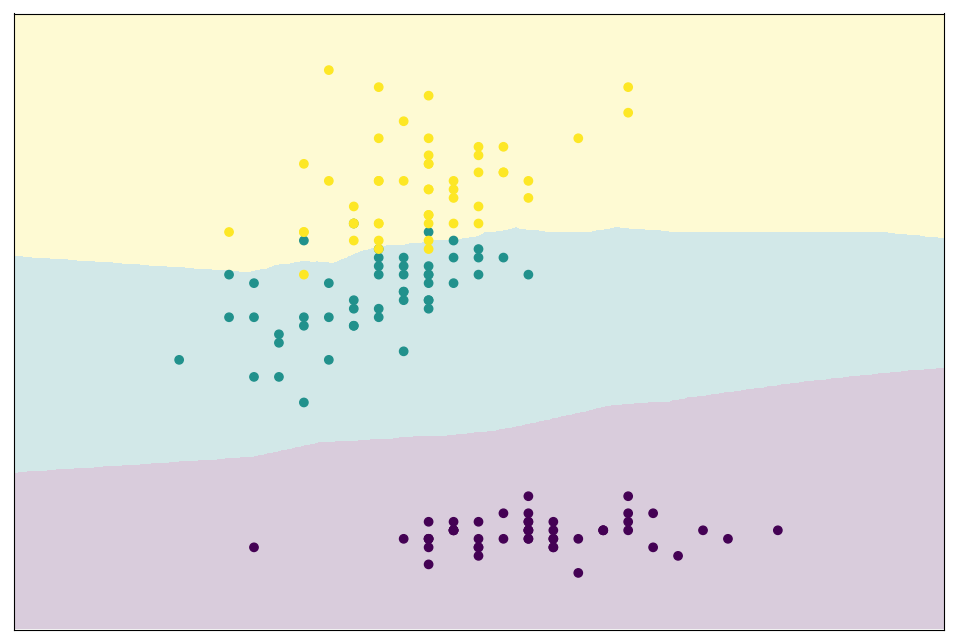

In [277]:
# your solution here
# for n in range(1,11):
#     sepal_knn=KNeighborsClassifier(n_neighbors=n)
#     sepal_knn.fit(X_train, y_train)
#     print(n,sepal_knn.score(X_test,y_test))
# print('\n')

n=7
sepal_knn=KNeighborsClassifier(n_neighbors=n)
sepal_knn.fit(X_train, y_train)
print(n,sepal_knn.score(X_test,y_test))

fig,ax = plt.subplots(figsize=(12,8))
sns.reset_orig()
ax.scatter(X[:,0], X[:,1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(sepal_knn, X, alpha=0.2, ax=ax)

<button data-toggle="collapse" data-target="#code2" class='btn btn-primary'>Show solution</button>

<div id="code2" class="collapse">

```python
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(12,8))
sns.reset_orig()
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(knn, X, alpha=0.2, ax=ax)
```

# Missing Data

Scikit-learn methods cannot handle missing data.

You must either drop observations with missing data or *impute* values in order to fit a model.

# Regression and Classification Models

<a href='linear_models.ipynb' class='btn btn-primary btn-lg'>
    Linear Models</a><br/><br/>
<a href='naive_bayes.ipynb' class='btn btn-primary btn-lg'>
    Naive Bayes Classifiers</a><br/><br/>
<a href='decision_trees.ipynb' class='btn btn-primary btn-lg'>
    Trees and Ensembles</a><br/><br/>
<a href='svm_models.ipynb' class='btn btn-primary btn-lg'>
    Support Vector Machines</a>

# Features

<!--<a href='feature_selection.ipynb' class='btn btn-primary btn-lg'>Selecting features</a>-->

<div class="row">
    <a href='Scaling_and_Normalization.ipynb' class='btn btn-primary btn-lg' style="float:left">Scaling and Normalization</a>
    <div class="row" style="float:right">
        <a href='Scaling_and_Normalization_Exercises.ipynb' class='btn btn-primary btn-lg' style="float:left">Exercises</a>
    </div>
</div><br/>
<div class="row">
    <a href='Feature_Preprocessing_Feature_Selection.ipynb' class='btn btn-primary btn-lg' style="float:left">Feature Preprocessing and Feature Selection</a>
    <div class="row" style="float:right">
        <a href='Feature_Preprocessing_Feature_Selection_Exercises.ipynb' class='btn btn-primary btn-lg' style="float:left">Exercises</a>
    </div>
</div>

<img src='img/copyright.png'>